In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import (train_test_split,
                                    RandomizedSearchCV,
                                    learning_curve,
                                    validation_curve,
                                    ShuffleSplit)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.utils import check_random_state
from sklearn.metrics import accuracy_score
import warnings; warnings.simplefilter('ignore')

In [4]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (7, 3)

In [5]:
class Solver:
    def __init__(self):
        self.datasets = [None, None]
        self.testsets = [None, None]
solver = Solver()

# Classification Problems

## Classification Problem (Testing) 1: Spotify Song Attributes

Problem: Given list of attributes-carrying songs on spotify, labelled with sentiment ('like' or 'dislike') of a given person, predict the sentiment of that person towards a newly seen song.


Description of Dataset:

- Number of attributes: 13
- Number of instances: 2017
- Output: binary
- Source: [Kaggle](https://www.kaggle.com/geomack/spotifyclassification/version/1)

In [6]:
""" Loading dataset """
df = pd.read_csv('data/spotify_classification.csv')

#""" Preliminary Exploratory Analysis """
# df.describe()
# df.head()
# df.info() # -> No missing data
# df.columns
# df.hist(figsize=(20, 15))

In [7]:
y_key = 'target'
excluded_keys = [y_key, # y-targets
                 'Unnamed: 0', # id
                 'mode', # unknown
                 'song_title', 'artist' # text data not handled
                ]

X, y = df.drop(columns=excluded_keys), df[y_key]
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
solver.datasets[0] = (X, y) # attributes and targets
solver.testsets[0] = (X_test, y_test)
# attribute_names = list(X.columns)

#""" Ensure: datasets[0] = (X, y) """

## Classification Problem (Testing) 2: Optical Recognition of Handwritten Digits Data Set

Problem: Given a list of hand-written digits and the label (the true digit being written), predict the written digit of a newly seen hand-written digit.


Description of Dataset:

- Number of attributes: 64 (pixel-wise grey levels, hence numerical)
- Number of instances: 1797 (Number of instances per class: ~180)
- Output: multiclass (10)
- Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits)

In [8]:
# """
# # Classification Problem (Testing) 2: MNIST Hand-written digit classification

# Problem: Given a list of hand-written digits and the label (the true digit being written), predict the written digit of a newly seen hand-written digit 

# ### Description of Dataset

# - Number of attributes: 784 (pixel-wise grey levels, hence numerical)
# - Number of instances: 70000
# - Output: multiclass (10)

# ### Source

# - [github](https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat)
# - [Details on openml](https://www.openml.org/d/554)
# """

# """ Load dataset """
# from sklearn.datasets import fetch_mldata

# mnist = fetch_mldata('MNIST original', data_home='data/')
# X, y = mnist.data, mnist.target

# random_state = check_random_state(0)
# permutation = random_state.permutation(X.shape[0])
# X = X[permutation]
# y = y[permutation]
# X = X.reshape((X.shape[0], -1))

# solver.datasets[4] = (X, y)

# """ Ensure: datasets[1] = (X, y) """

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

# plt.gray()
# plt.matshow(digits.images[0]) 

X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
solver.datasets[1] = (X, y)
solver.testsets[1] = (X_test, y_test)

#""" Ensure: datasets[1] = (X, y) """

In [10]:
# from sklearn.datasets import load_iris

# iris = load_iris()
# X, y = iris.data, iris.target

# # plt.gray()
# # plt.matshow(digits.images[0]) 

# # solver.datasets[2] = (X, y)
# solver.datasets.append((X, y))
# (X, y)

In [11]:
# from sklearn.datasets import load_wine

# wine = load_wine()
# X, y = wine.data, wine.target

# # solver.datasets[3] = (X, y)
# solver.datasets.append((X, y))
# (X, y)

In [12]:
# """
# # Classification Problem (Testing) 2: MNIST Hand-written digit classification

# Problem: Given a list of hand-written digits and the label (the true digit being written), predict the written digit of a newly seen hand-written digit 

# ### Description of Dataset

# - Number of attributes: 784 (pixel-wise grey levels, hence numerical)
# - Number of instances: 70000
# - Output: multiclass (10)

# ### Source

# - [github](https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat)
# - [Details on openml](https://www.openml.org/d/554)
# """

# """ Load dataset """
# from sklearn.datasets import fetch_mldata

# mnist = fetch_mldata('MNIST original', data_home='data/')
# X, y = mnist.data, mnist.target

# random_state = check_random_state(0)
# permutation = random_state.permutation(X.shape[0])
# X = X[permutation]
# y = y[permutation]
# X = X.reshape((X.shape[0], -1))

# # solver.datasets[4] = (X, y)
# solver.datasets.append((X, y))

# """ Ensure: datasets[1] = (X, y) """

## Dataset Choice Justifications

Problem 1 and 2 share the features that they are both classification problems (as opposed to regression) with numerical attributes, and of similar number of examples (around 2000); one notable difference between the datasets is the number of dimensions (attributes), with a 13 vs 64 match, and obviously the binary/multiclass-output distinction.

They are chosen because my main investigation would be on hyperparameter optimisation and solving non-trivial problems. On the one hand, a relatively smaller dataset would be efficient for cross-validation thus helps with faster hyperparameter search given that my setup is just a personal laptop, and so favourable for running more experiments under the same amount of time to admit comparisons of model configurations. A caveat is that I started out to try to use the 70000-example MNIST dataset for problem 2, but with the said limitations I downscaled it to the original UCI NIST dataset. On the other hand, these two problems are authentic and not stright-forward in different degrees:

- The spotify dataset uses acoustic attributes to characterise songs, fitted towards the dataset creator's preferences, thus can serve as a good case study of how good such sentiment classification can perform on a given spotify user; I could see this application similar to YouTube video recommendation system, stripping away the time element.

- The handwritten digit recognition dataset is said to be a standard hello-world problem to supervised learning problems, thus an important benchmark. Since this is not entirely a computer vision task, the dataset consists of the greyscale value of each pixel of the handwritten digit image for each exmaple, in a readily usable format for conventional machine learning models. Lastly, handwritten digit recognition again has no closed-form solution and sometimes humans can make mistake too, making it interesting to build a machine-learnt algorithm around it.


# Experimental Procedures

Firstly, the dataset is split into the training (70%) and testing set (30%) with `sklearn.model_selection.train_test_split`, and that the testing set is held till the very last test-time comparison between algorithms in the Conclusion.

The experiments consist of units of a two-step process, repeated over each model and each problem:

1. Plotting Validation Curve: Vary two searched hyperparameters at the same time, plot the percentage errors of the correpondingly trained model in each scenario, and select the best pair of hyperparameters for the specific model-dataset scenario
2. Plotting Learning Curve: With the best hyperparameters injected to the model, run the training on increasing proportion of the entire traning set, to observe the effect of training set size on the performance (percentage error) of the model

Both of these curves employ cross-validation to compute a set of training and validation scores for every hyperparameter pair, which are then converted to errors instead, and then mean of the training errors and validation errors are plotted against the 1st varying hyperparameter. This gives one curve, now repeat this for different values of the 2nd hyperparater to get a collection of curves.

The cross validation strategy I used is `ShuffleSplit` from the sklearn library:

- Number of splits: 10
- Test size: 0.2, i.e. fraction of training set to form the validation set

in which random indexes are chosen to split the validation set from the training set, and resembles a $K=10$-fold cross-validation except that this is not necessarily a partition to contain all examples, so it does not guarantee that all folds are differnt.

Each curve carries with itself a coloured shading, representing the +/- 1 standard derviation percentage error.

For validation curves, I used a solid curve for training and a dashed curve for validation errors, and the colour of the curves label a particular setting of the 2nd hyperparameter. For learning curves, just a red dashed curve for training and green dashed curve for validation are needed.

Finally, the validation curve serves also to search for hyperparameters since the performance of each configuration will be plotted. This is similar to `GridSearchCV` but a selection of values of the 2nd hyperparameter is chosen to cover orders of magnitude or discrete values. But the sampled selection does not test for all values uniformly, so this can be thought of as a smaller-scale `RandomSearchCV` too.

In [13]:
def plot_validation_curve(estimator, title, X, y, var_param_name, var_param_range, fixed_param_name, fixed_param_value, color, alpha, cv=None, ylim=None, verbose=0):
    """
    Generate a plot of 
    
    Parameters
    ----------
    ...
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(var_param_name)
    plt.ylabel("Percentage Error")
    train_scores, valid_scores = validation_curve(estimator, X, y, var_param_name, var_param_range, cv=cv, verbose=verbose)
    train_errors, valid_errors = 1.0 - train_scores, 1.0 - valid_scores
    
    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    valid_errors_mean = np.mean(valid_errors, axis=1)
    valid_errors_std = np.std(valid_errors, axis=1)
    plt.grid()

    plt.fill_between(var_param_range, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color=color)
    plt.fill_between(var_param_range, valid_errors_mean - valid_errors_std,
                     valid_errors_mean + valid_errors_std, alpha=0.1, color=color)
    
    plt.plot(var_param_range, train_errors_mean, 'o-', color=color, alpha=alpha,
             label=f"Training error, {fixed_param_name} = {fixed_param_value}")
    plt.plot(var_param_range, valid_errors_mean, 'o-', color=color, alpha=alpha, linestyle='dashed',
             label=f"Cross-validation test error, {fixed_param_name} = {fixed_param_value}")

    plt.legend(loc="best")
    return plt

In [14]:
def plot_learning_curve(estimator, title, X, y, i, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), verbose=0):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Percentage Training Examples")
    plt.ylabel("Percentage Error")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_errors, test_errors = 1.0 - train_scores, 1.0 - test_scores
    
    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()
    
    train_sizes_percentages = train_sizes / np.max(train_sizes)

    plt.fill_between(train_sizes_percentages, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes_percentages, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes_percentages, train_errors_mean, 'o-', color="r", linestyle='dashed',
             label="Training error")
    plt.plot(train_sizes_percentages, test_errors_mean, 'o-', color="g", linestyle='dashed',
             label="Cross-validation test error")

    plt.legend(loc="best")
    return plt

# Algorithms, Results, Analyses

## Decision Trees

Searched hyperparameters

- Maximum number of leaf nodes: limits the total number of leaf "class" nodes in the entire tree
- Maximum depth of tree: limits the depth of the entire tree

**Pre-pruning**: these two hyperparameters are examples of pre-pruning settings in `sklearn.tree.DecisionTreeClassifier`. In pre-pruning, as decision trees grow, they observe these constraints and as a result are prevented from developing into a near-full tree with numerous leaf nodes perhaps representing special cases; this is the opposite of post-pruning, which is not used here, but the idea is after organically growing the tree, we then with various choices of algorithm perform surgeries on the tree to cut nodes and branches, to reduce the number of nodes.

In [34]:
def validate_dt(max_depth, color='r', dataset_idx=0):
    title = "Model Complexity by Validation Curves, Decision Trees"
    max_leaf_nodes_range = np.linspace(2, 70, 20, dtype=np.int32)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = DecisionTreeClassifier(max_depth=max_depth)
    plot_validation_curve(estimator, title, *solver.datasets[dataset_idx], "max_leaf_nodes", max_leaf_nodes_range,
                     "max_depth", max_depth, color, 0.9, cv=cv, ylim=(0.0, 1.0))

In [35]:
def train_dt(max_depth, max_leaf_nodes, dataset_idx=0):
    title = f"Effect of training set sizes by Learning Curves\n Decision Trees ($max\ depth={max_depth}, max\ leaf\ nodes={max_leaf_nodes}$)"
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
    plot_learning_curve(estimator, title, *solver.datasets[dataset_idx], 1, ylim=(0.00, 1.01), cv=cv, n_jobs=4)

### Problem 1: Hyperparameter Search and Cross-Validation

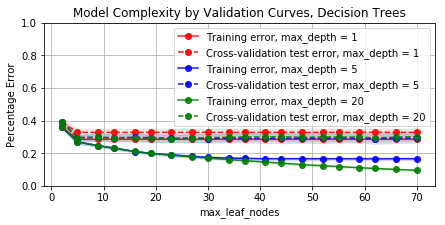

In [36]:
validate_dt(max_depth=1, color='r', dataset_idx=0)
validate_dt(max_depth=5, color='b', dataset_idx=0)
validate_dt(max_depth=20, color='g', dataset_idx=0)
plt.show()

This chart shows that as we increase `max_leaf_nodes`, the training set with higher `max_depth` tends to overfit, as reflected in the gap between the blue and green training error curve with their own test/validation error curve. The low `max_depth = 1` curve perform consistently well in both train and validation since the red cures are close to each other.

Having higher `max_leaf_nodes` does not help with accuracy since it is almost a constant flat curve for all the validation curves; an explanation could be that owing to having fewer (13) attributes, problem 1 does not need too many decision nodes to reach a decision, or that there is a strong prominent attribute that can largely determine sentiment. Higher `max_depth` does give a slight advantage, since the green `max_depth = 20` and `max_depth = 5` validation curve has slightly lower error than the other two. Combined with an indifferent `max_leaf_nodes`, we can deduce that the decision tree for problem 1 can be tall but with few branches, so the tree either suffices with one-level deep, ot it forms a sequence of conditions instead of having branched out independent decision paths to push a higher accuracy. Note that `max_depth = 20` and `max_depth = 5` essentially gives the same result, showing that `max_depth = 5` is a good enough upperbound, but it does not hurt to choose a larger value.


### Problem 1: Effect of training set sizes and Learning Curve

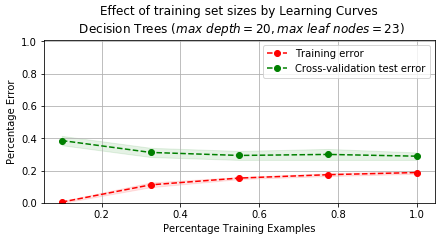

In [37]:
train_dt(max_depth=20, max_leaf_nodes=23, dataset_idx=0)
plt.show()

Best hyperparameters chosen:

- `max_depth = 20`
- `max_leaf_nodes = 23`

This chart shows that as we supply more training examples, the accuracy correspondingly increases, giving a positive correlation, but only up to around 55% as curves flatten out. This also helps with combatting overfitting as the gap between training and validation error curves shrinks with more examples. The resultant validation error rate is around 30%.

### Problem 2: Hyperparameter Search and Cross-Validation

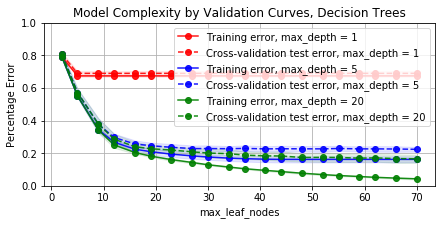

In [38]:
validate_dt(max_depth=1, color='r', dataset_idx=1)
validate_dt(max_depth=5, color='b', dataset_idx=1)
validate_dt(max_depth=20, color='g', dataset_idx=1)
plt.show()

This chart shows a number of interesting observations. First, `max_depth = 1` this time is apparently too simplex for classifying handwritten digits, because of a much larger the number of dimensions, and it gives an error rate worse than random guess (50% < 70%). Second, the two hyperparameters show elaborate variations in this problem, in that the validation curves of `max_depth = 5` does go down with the training curve, and even more so with `max_depth = 20`. We can see that both `max_depth` and `max_leaf_nodes` promote accuracy, and for `max_leaf_nodes` it is up to about `max_leaf_nodes = 50`. Choosing a more-than-enough `max_leaf_nodes` again would not be restrictive. Finally, the training-validation gap is seen to be relatively small in all cases, showing that decision trees is generalising quite well.

### Problem 2: Effect of training set sizes and Learning Curve

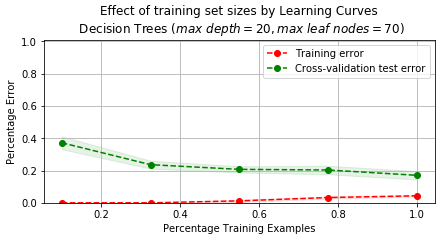

In [39]:
train_dt(max_depth=20, max_leaf_nodes=70, dataset_idx=1)
plt.show()

Best hyperparameters chosen:

- `max_depth = 20`
- `max_leaf_nodes = 70`

This chart shows that providing more training examples do help with reducing error, and the gap is similarly large as in problem 1. Notably with few training examples, the decision tree starts out to overfit with 0 training error, then slowly recover more error to approach the validation error. The resultant validation error rate is around 18%.

## Neural Networks

Searched hyperparameters

- Batch size: how many examples are taken to compute the stochastic gradient for optimisation
- Number of hidden layers: how many layers interleave the input and output neuron layers, the more the deeper the network

Fixed hyperparameters

- Size of each hidden layer: 100
- Solver: Adam
- Activation: ReLu

Additional fixed setup

- A random 40% subset (fraction) of the training set is taken to validate, because otherwise cross-validation would take too long to finish
- Elapsed time of 40% subset validation: under 5 minutes; full set: empirically this can take 20-30 minutes

The type of neural network in use is Multilayer Perceptron, from `sklearn.neural_network.MLPClassifier`, because I claim that such kind of network has enough representational power to potentially approximate the target functions in those problems, so that we do not need to employ more advanced models. The difficulty remains to train it appropriately, otherwise even with the high representational power, the neural network can still be wired in an undesirable manner that gives low accuracy.

Standard settings like a ReLu activation and Adam optimiser are chosen, since they tend to work well in general to for example avoid gradient saturation and jump over local minimums.

In [1]:
def validate_nn(num_hidden_layers, color='r', dataset_idx=0):
    title = "Model Complexity by Validation Curves, Neural Networks"
#     reg_strength_range = np.logspace(-5, 0, 12)
    batch_size_range = np.linspace(10, 200, 12, dtype=np.int32)
    hidden_layer_size = 100
    
    sample_fraction = 0.4 #0.7
    sample_size = int(sample_fraction * len(solver.datasets[dataset_idx][0]))
    X, y = solver.datasets[dataset_idx]
    random_idx = np.random.choice(X.shape[0], sample_size, replace=False)
    X, y = np.array(X)[random_idx, :], np.array(y)[random_idx]
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = MLPClassifier(hidden_layer_sizes=np.full((num_hidden_layers, ), hidden_layer_size), # tuple(hidden_layer_size for i in range(num_hidden_layers)),
                              solver='adam', activation='relu', learning_rate_init=1e-3)
    plot_validation_curve(estimator, title, X, y, "batch_size", batch_size_range, # "alpha", reg_strength_range,
                     "num_hidden_layers", num_hidden_layers, color, 0.9, cv=cv, ylim=(0.0, 0.55)
#                           , verbose=3
                         )

In [17]:
def train_nn(num_hidden_layers, batch_size, dataset_idx=0):
    title = f"Effect of training set sizes by Learning Curves\n Neural Networks ($num\ hidden\ layers={num_hidden_layers}, batch\ size={batch_size}$)"
    hidden_layer_size = 100
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = MLPClassifier(hidden_layer_sizes=np.full((num_hidden_layers, ), hidden_layer_size),
                              batch_size=batch_size,
                            solver='adam', activation='relu')
    plot_learning_curve(estimator, title, *solver.datasets[dataset_idx], 1, ylim=(0.00, 1.01), cv=cv, n_jobs=4)

### Problem 1: Hyperparameter Search and Cross-Validation

In [42]:
# validate_nn(num_hidden_layers=2, color='r', dataset_idx=3)
# validate_nn(num_hidden_layers=3, color='b', dataset_idx=3)
# validate_nn(num_hidden_layers=4, color='g', dataset_idx=3)
# plt.show()
# # 19 minutes -> up to 3rd search, 0.5 flat line
# # 5- minutes on lbfgs -> 0.5

In [43]:
# validate_nn(num_hidden_layers=1, color='r', dataset_idx=1)
# validate_nn(num_hidden_layers=5, color='b', dataset_idx=1)
# validate_nn(num_hidden_layers=10, color='g', dataset_idx=1)
# plt.show()
# # 19 minutes on solver.datasets[2] -> straight jump from percentage error 0 to 0.6-0.8
# # 13 minutes on solver.datasets[1] -> nice low error, num_hidden_layers=5
# # 7 minutes on solver.datasets[1] with adam -> batch_size / alpha needs zoom in

# # FIXME: Data size positively correlates with neural network score

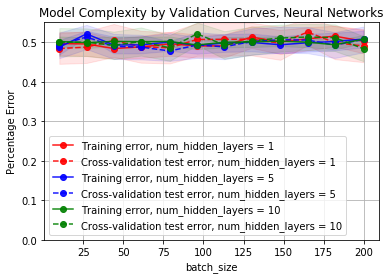

In [15]:
validate_nn(num_hidden_layers=1, color='r', dataset_idx=0)
validate_nn(num_hidden_layers=5, color='b', dataset_idx=0)
validate_nn(num_hidden_layers=10, color='g', dataset_idx=0)
plt.show()
# 19 minutes on solver.datasets[2] -> straight jump from percentage error 0 to 0.6-0.8

This chart shows that in problem 1, `num_hidden_layers` and `batch_size`in the most general terms do not contribute much to improving accuracy, but still have some effect. All of the curves linger around an error rate of 50%, the best result is obtained by the blue validation curve, better by a slight edge; this points to an observation that a moderate number of hidden layers (`num_hidden_layers = 5`) would achieve sufficient complexity but not too much. Batch size of 82 as evidenced in the blue validation curve is relatively optimal.

### Problem 1: Effect of training set sizes and Learning Curve

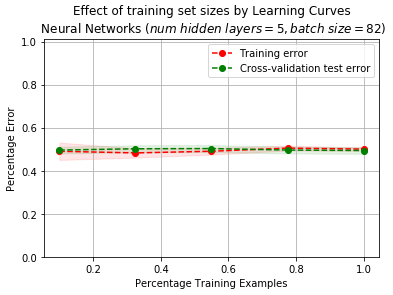

In [18]:
train_nn(num_hidden_layers=5, batch_size=82, dataset_idx=0)
plt.show()

Best hyperparameters chosen:

- `num_hidden_layers = 5`
- `batch_size = 82`

This chart shows that the training curve quickly aligns with the validation curve so no overfitting happened, suggesting that the trained neural network performs well in terms of tuning its bias and variance to reflect validation time expectations. The flat shape of the curves speaks of the irrelevance of larger training volumes for neural network in this example. The resultant validation error rate is around 50%.

### Problem 2: Hyperparameter Search and Cross-Validation

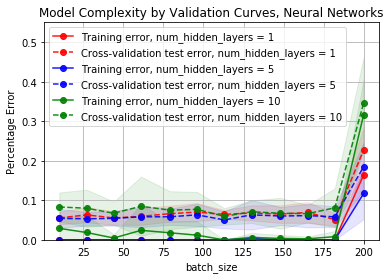

In [19]:
validate_nn(num_hidden_layers=1, color='r', dataset_idx=1)
validate_nn(num_hidden_layers=5, color='b', dataset_idx=1)
validate_nn(num_hidden_layers=10, color='g', dataset_idx=1)
plt.show()

This chart shows that neural networks work extremely well in problem 2. The percentage errors are contained within 0 to 10%. In this case, having too many hidden layers tend to hamper learning, since the blue `num_hidden_layers = 5` validation curve shows the lowest error over the batch sizes. The effect of batch size is more observable beyond `batch_size > 175` where all curves have their percentage error bounced up, especially in `num_hidden_layers = 10`, signifying that batch size shall not be chosen in that range. The best batch size worked with the blue validation at a size of 112.

### Problem 2: Effect of training set sizes and Learning Curve

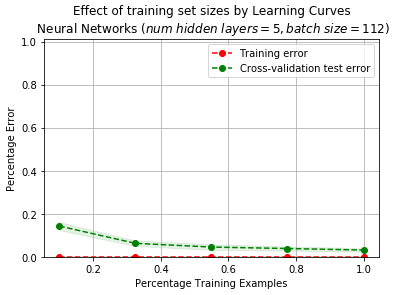

In [21]:
train_nn(num_hidden_layers=5, batch_size=112, dataset_idx=1)
plt.show()

Best hyperparameters chosen:

- `num_hidden_layers = 5`
- `batch_size = 112`

This chart shows that the neural network does leverage more training examples to learn to lower its validation error. While the training error is consistently 0%, it does not appear to be an overfit because the validation error goes similarly low and approaches the training error at 100% training examples. Note that since the hidden layer size is set to be 100, a relatively wide setting (many neurons in one layer), even with not many hidden layers, the neural network still has the capacity to solve problem 2 rather fully. (Since a similar result can be expected from choosing `num_hidden_layers = 1`) The resultant validation error rate is below 3%.

## Boosting

Searched hyperparameters

- Number of estimators: that participate in the boosting ensemble
- Learning rate

Fixed hyperparameters

- Weak learner base estimator: Decision Tree Classifier with best `max_depth = 20`

Additional fixed setup

- A random 40% subset (fraction) of the training set is taken to validate, because otherwise cross-validation would take too long to finish
- Elapsed time of 40% subset validation: under 5 minutes; full set: empirically this can take 20-30 minutes

AdaBoost is picked as the boosting algorithm, implemented as `sklearn.ensemble.AdaBoostClassifier`.

**Pre-Pruning**: the learning rate in the context of AdaBoost is defined as a shrinking factor of all the weights of the hypotheses (weak learners). While a learning rate less than 1 would then scale up the weights, a shrinking factor more than 1 will scale down the weights. This serves as a pre-pruning mechanism because by scaling up weights of relatively important weak learners and scaling down the weights of less important ones, we can promote or silent the weak learners other than letting the boosting core adjust the weights. In extreme cases, we can prune away an unwanted weak learner if the learning rate is set to suppress its possibly already-low weight.

In [22]:
def validate_boosting(learning_rate, color='r', dataset_idx=0):
    title = "Model Complexity by Validation Curves, Boosting (Decision Trees)"
    n_estimators_range = np.linspace(1, 80, 12, dtype=np.int32)
    best_max_depth = 20
    
    sample_fraction = 0.4 #0.7
    sample_size = int(sample_fraction * len(solver.datasets[dataset_idx][0]))
    X, y = solver.datasets[dataset_idx]
    random_idx = np.random.choice(X.shape[0], sample_size, replace=False)
    X, y = np.array(X)[random_idx, :], np.array(y)[random_idx]

    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_max_depth), learning_rate=learning_rate)
    plot_validation_curve(estimator, title, X, y, "n_estimators", n_estimators_range,
                     "learning_rate", learning_rate, color, 0.9, cv=cv, ylim=(0.0, 0.5)
#                           , verbose=3
                         )

In [23]:
def train_boosting(learning_rate, n_estimators, dataset_idx=0):
    title = f"Effect of training set sizes by Learning Curves\n Boosting (Decision Trees) ($learning\ rate={learning_rate}, num\ estimators={n_estimators}$)"
    best_max_depth = 20
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_max_depth), learning_rate=learning_rate, n_estimators=n_estimators)
    plot_learning_curve(estimator, title, *solver.datasets[dataset_idx], 1, ylim=(0.00, 1.01), cv=cv, n_jobs=4)

### Problem 1: Hyperparameter Search and Cross-Validation

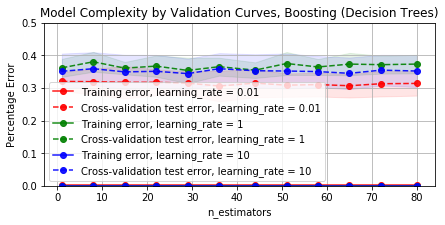

In [50]:
validate_boosting(learning_rate=0.01, color='r', dataset_idx=0)
validate_boosting(learning_rate=1, color='g', dataset_idx=0)
validate_boosting(learning_rate=10, color='b', dataset_idx=0)
plt.show()
# 5 minutes-

This chart shows that the number of estimators have unobvious effect on accuracies, while a learning rate less than 1 pushes down the validation error. Training errors of all three settings stay at 0% so AdaBoost can learn to clasify the sampled training set with perfect accuracies. The best accuracy is achieved by `learning_rate = 0.01, n_estimators = 36` on the red dashed curve.

In [51]:
# validate_boosting(learning_rate=1e-3, color='r', dataset_idx=3)
# validate_boosting(learning_rate=0.1, color='g', dataset_idx=3)
# validate_boosting(learning_rate=10, color='b', dataset_idx=3)
# plt.show()
# # quick on solver.datasets[2] -> 0.0/0.05% for all learning rates overlapping flat lines
# # quick on solver.datasets[3] -> 0.0/0.05% for all learning rates overlapping flat lines
# # reasonably progressing on solver.datasets[3] with max_depth=2 ->

### Problem 1: Effect of training set sizes and Learning Curve

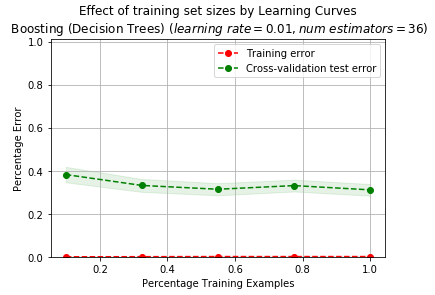

In [25]:
train_boosting(learning_rate=0.01, n_estimators=36, dataset_idx=0)
plt.show()
# interpret zero training error: https://stackoverflow.com/questions/15020134/how-to-calculate-alpha-if-error-rate-is-zero-adaboost

Best hyperparameters chosen:

- `learning_rate = 0.01`
- `n_estimators = 36`

This chart shows that validation error goes down slowly with more training examples given, while overfitting exists since the train-validation gap remains large. The improvement goes from about 40% down to the resultant error rate of 36%.

### Problem 2: Hyperparameter Search and Cross-Validation

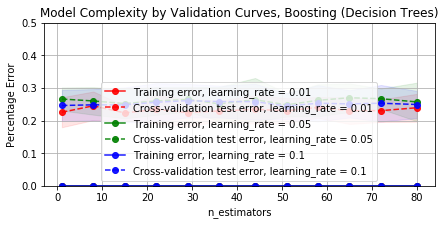

In [53]:
validate_boosting(learning_rate=0.01, color='r', dataset_idx=1)
validate_boosting(learning_rate=0.05, color='g', dataset_idx=1)
validate_boosting(learning_rate=0.1, color='b', dataset_idx=1)
plt.show()

This chart shows that a lower learning rate is more favourable in learning problem 2, since the red validation curve of `learning_rate = 0.01` has the lowest percentage error. The varying number of estimators gives different error rates across the learning rate settings, with `n_estimators = 15, 28` to be the best; the variation is not large but considerable. The training errors are again perfectly 0%.

### Problem 2: Effect of training set sizes and Learning Curve

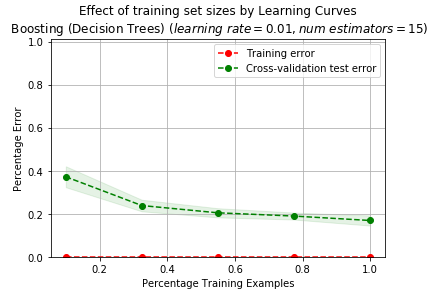

In [26]:
train_boosting(learning_rate=0.01, n_estimators=15, dataset_idx=1)
plt.show()

Best hyperparameters chosen:

- `learning_rate = 0.01`
- `n_estimators = 15`

This chart shows that validation error goes down with more training examples given, and overfitting is reduced compared with problem 1. The improvement goes from 37% down to the resultant error rate of around 18%, a significant progress.

## Support Vector Machines

Seached hyperparameters

- C value: how much to penalise misclassified points, i.e. smaller the C, more lenient to misclassification
- Kernels: rbf (gaussian), poly (polynomial)

Fixed hyperparameters

- Degree of polynomial kernel: 4

Additional fixed setup

- A random 40% subset (fraction) of the training set is taken to validate, because otherwise cross-validation would take too long to finish
- Elapsed time of 40% subset validation: under 5 minutes; full set: empirically this can take 20-30 minutes

Implements `sklearn.svm.SVC` classifier.

In [23]:
def validate_svm(kernel, color='r', dataset_idx=0):
    title = "Model Complexity by Validation Curves, SVM"
    c_range = np.linspace(1e-3, 50, 12)
    
    sample_fraction = 0.4 #0.7
    sample_size = int(sample_fraction * len(solver.datasets[dataset_idx][0]))
    X, y = solver.datasets[dataset_idx]
    random_idx = np.random.choice(X.shape[0], sample_size, replace=False)
    X, y = np.array(X)[random_idx, :], np.array(y)[random_idx]
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = SVC(kernel=kernel, degree=4)
    plot_validation_curve(estimator, title, X, y, "C", c_range,
                     "kernel", kernel, color, 0.9, cv=cv, ylim=(0.0, 1.01)
#                           , verbose=3
                         )

In [24]:
def train_svm(kernel, C, dataset_idx=0):
    title = f"Effect of training set sizes by Learning Curves\n SVM ($kernel={kernel}, C={C}$)"
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = SVC(kernel=kernel, C=C)
    plot_learning_curve(estimator, title, *solver.datasets[dataset_idx], 1, ylim=(0.00, 1.01), cv=cv, n_jobs=4)

### Problem 1: Hyperparameter Search and Cross-Validation

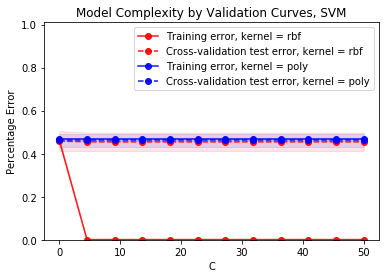

In [27]:
validate_svm(kernel='rbf', color='r', dataset_idx=0)
validate_svm(kernel='poly', color='b', dataset_idx=0)
plt.show()
# 5 + 10 minutes+
# 28 minutes

This chart shows that for the matter of problem 1, both gaussian and polynomial kernels perform roughly equally well on validation. They draw at just below an error rate of 50%. What is interesting is that the sampled training examples actually fit into circularly split regions, since it gives 0% error rate most of the time, and with the misclassification tolerance `C > 5`. A C value lower than that threshold would not penalise enough of the hypothesis to urge it to adapt, but a higher C value does not do further improvement, but is also harmless to choose. It is also suspected to be the case that the training sample fraction is too small (for this problem) that the training data is not representative enough to give a generalisable separating hyperplane for validation time, so the dataset may contain a number of more extreme samples since the training set is shuffled before sampling, or that the sampling method might need improvement in terms of randomness and a larger sample fraction (which requires more time in validation).

Since the validation plots of the two kernels show that the `rbf` kernel has slightly less error rate, it is considered a better kernel.

### Problem 1: Effect of training set sizes and Learning Curve

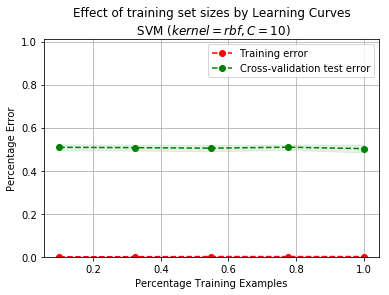

In [28]:
train_svm(kernel='rbf', C=10, dataset_idx=0)
plt.show()

Best hyperparameters chosen:

- `kernel = rbf`
- `C = 10`

The resultant validation error stays almost constant at about 50%, so SVM does not learn with more training examples. This model also experiences serious overfitting, in that after the gaussian kernel completely fits into the data points (0% error rate), the new data points can barely fit in to be assigned the appropriate class region.

### Problem 2: Hyperparameter Search and Cross-Validation

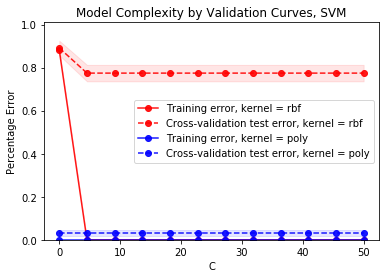

In [25]:
validate_svm(kernel='rbf', color='r', dataset_idx=1)
validate_svm(kernel='poly', color='b', dataset_idx=1)
plt.show()
# 12 minutes -> ~ 47% error straight line

This chart shows that the polynomial kernal is more well-suited for hand-written digit classification. The error rate of the blue `kernel = poly` validation curve kisses its training curve (which has 0% error) at some 2% error. This kernel does not experience variation in C values, but the gaussian kernel still requires `C > 5` as in problem 1 to drop its errors in both curves. For the red `kernel = rbf` setting, stark difference between training  (perfect 0%) and validation error (around 80%) suggests that this kernel generalises poorly with data outside of the training samples which define the separating boundaries. This seems not to be the case for the degree-4 polynomial kernel, suggesting that the decision boundaries of classifying the digits can be decomposed not into circular regions but polynomial curves.

### Problem 2: Effect of training set sizes and Learning Curve

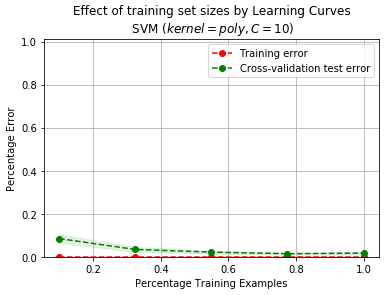

In [26]:
train_svm(kernel='poly', C=10, dataset_idx=1)
plt.show()

Best hyperparameters chosen:

- `kernel = poly`
- `C = 10`

Impressively, the validation curve squeezes towards 0% as more training examples are seen, and converges to training error curve, meaning that overfitting is minimal. The resultant validation error rate is about 1-2%.

## *k*-Nearest Neighbors

Searched hyperparameters

- Number of neighbors $k$: how many neighboring data points are counted and collected for voting in classification
- Weights scheme: uniform, distance

Implements `sklearn.neighbors.KNeighborsClassifier`.

Weights: the k-nearest neighbors will vote on which class the concerned data point should be classified into, but the weight of the vote can either be equally important (uniform), or depending on distance (the closer the more important)

In [13]:
def validate_knn(weights, color='r', dataset_idx=0):
    title = "Model Complexity by Validation Curves, $k$-Nearest Neighbors"
    n_neighbors_range = np.linspace(2, 40, 12, dtype=np.int32)[1::2]
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = KNeighborsClassifier(weights=weights)
    plot_validation_curve(estimator, title, *solver.datasets[0], "n_neighbors", n_neighbors_range,
                     "weights", weights, color, 0.9, cv=cv, ylim=(0.0, 0.5))

In [28]:
def validate_knn(weights, color='r', dataset_idx=0):
    title = "Model Complexity by Validation Curves, $k$-Nearest Neighbors"
    n_neighbors_range = np.linspace(2, 40, 12, dtype=np.int32)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = KNeighborsClassifier(weights=weights)
    plot_validation_curve(estimator, title, *solver.datasets[0], "n_neighbors", n_neighbors_range,
                     "weights", weights, color, 0.9, cv=cv, ylim=(0.0, 0.5))

In [29]:
def train_knn(weights, n_neighbors, dataset_idx=0):
    title = f"Effect of training set sizes by Learning Curves\n $k$-Nearest Neighbors ($weights={weights}, num\ neighbors={n_neighbors}$)"
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = KNeighborsClassifier(weights=weights)
    plot_learning_curve(estimator, title, *solver.datasets[dataset_idx], 1, ylim=(0.00, 1.01), cv=cv, n_jobs=4)

### Problem 1: Hyperparameter Search and Cross-Validation

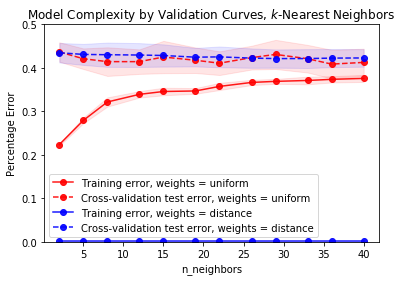

In [16]:
validate_knn(weights='uniform', color='r', dataset_idx=0)
validate_knn(weights='distance', color='b', dataset_idx=0)
plt.show()

This chart shows that the uniform weighting scheme is more preferred in problem 1, even though both the validation curves are similar at around 40% error rate, the uniform curve has a lower error rate. While the validation curves remain mostly unaffected, as `k` increases, the uniformly weighted training error grows; but this also gives the pattern that it is closing the gap with its validation curve until they almost meet at `k = 36`. The distance-weighted training curve on the other hand, gives 0% error but its high validation error reveals overfitting.

`k = 22` is chosen as the best number of neighbors as it gives the minimum on the uniformly weighted validation curve.

### Problem 1: Effect of training set sizes and Learning Curve

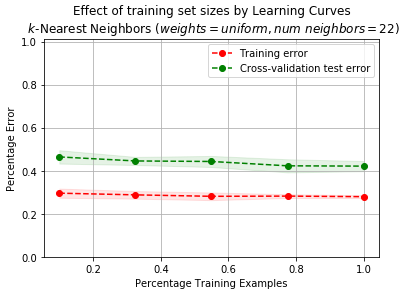

In [30]:
train_knn(weights='uniform', n_neighbors=22, dataset_idx=0)
plt.show()

Best hyperparameters chosen:

- `weights = uniform`
- `n_neighbors = 22`

Both training and validation errors do not depend much on the number of training examples given: the curves show a very gentle downward trend. The resultant validation error rate is about 43%.

### Problem 2: Hyperparameter Search and Cross-Validation

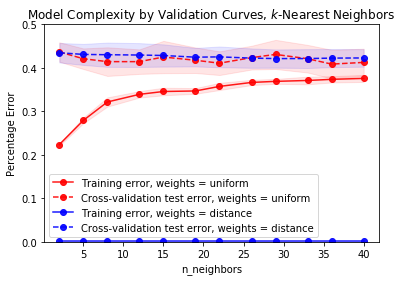

In [18]:
validate_knn(weights='uniform', color='r', dataset_idx=1)
validate_knn(weights='distance', color='b', dataset_idx=1)
plt.show()

This chart shows a very similar pattern as seen in the model complexity curves of problem 1. The uniform weight scheme and `k = 22` is selected as the best hyperparameters, at a validation error rate of again around 40%.

### Problem 2: Effect of training set sizes and Learning Curve

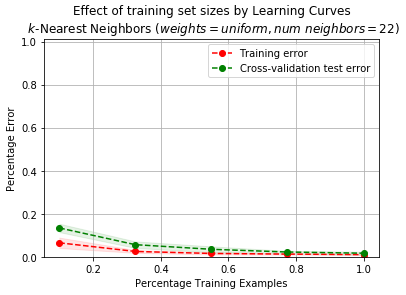

In [31]:
train_knn(weights='uniform', n_neighbors=22, dataset_idx=1)
plt.show()

Best hyperparameters chosen:

- `weights = uniform`
- `n_neighbors = 22`

This chart shows that the kNN model does not overfit since the training and validation curve eventually coincide, with shrinking gap as more training examples are considered and utilised, and has a low absolute percentage error. The resultant validation error rate is around 2%.

# Conclusions

The notion of "best" is defined simply as accuracy, i.e. the portion of examples that are classified correctly over the total number of examples.

After the experiments above, we have obtained for each of the 5 models and each of the 2 problems, 2 searched hyperparameters. We now apply these optimal hyperparameters to retrain all the models with the entire training dataset, test against the fresh unseen testing set, and plot the accuracies between the 5 models for clear comparison, for each dataset separately.

In [32]:
categories = ['DT', 'NN', 'Boosting', 'SVM', 'kNN'] 

def test_accuracies(estimators, dataset_idx=0):
    X_train, y_train, X_test, y_test = *solver.datasets[dataset_idx], *solver.testsets[dataset_idx]
    fitted_predicted_estimators = map(lambda estimator: estimator.fit(X_train, y_train).predict(X_test), estimators)
    return list(map(lambda estimator: accuracy_score(y_test, estimator), fitted_predicted_estimators))

def plot_accuracies(accuracies, dataset_name):
    plt.title(f'Comparison of Algorithm Accuracies on {dataset_name}') 
    plt.ylabel('Accuracy')
    
    left = np.arange(len(categories))
    
    plt.xticks(left, categories)
    plt.bar(left, accuracies, width=0.3, align='center')
#     for i, y in enumerate(accuracies):
#         plt.text(x=i , y=y+0.5, s=str(accuracies), size=6)

### Problem 1: Comparison across algorithms

Best algorithm is DT
with accuracy 0.7161716171617162


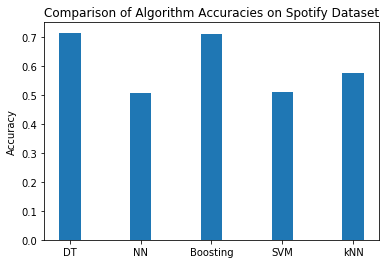

In [34]:
# Best hyperparametrised estimators
estimators = [
    DecisionTreeClassifier(max_depth=20, max_leaf_nodes=23),
    MLPClassifier(hidden_layer_sizes=np.full((5, ), 100), batch_size=82),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=20), learning_rate=0.01, n_estimators=36
    ),
    SVC(kernel='rbf', C=10, degree=4),
    KNeighborsClassifier(weights='uniform', n_neighbors=22)
]

accuracies = test_accuracies(estimators=estimators, dataset_idx=0)
print(f"Best algorithm is {categories[np.argmax(accuracies)]}\nwith accuracy {accuracies[np.argmax(accuracies)]}")
plot_accuracies(accuracies=accuracies, dataset_name='Spotify Dataset')
plt.show() 

Tree-based models seem to work best on problem 1. Neural Networks and SVM suffer from a high error drawback to arrive at around 50%, and kNN slightly better at 55%. Decision Tree and Boosting gives over 70% accuracy, with the original decision trees leading by an extremely slight edge to deliver the best performance of 71.6% accuracy.

### Problem 2: Comparison across algorithms

Best algorithm is NN
with accuracy 0.9851851851851852


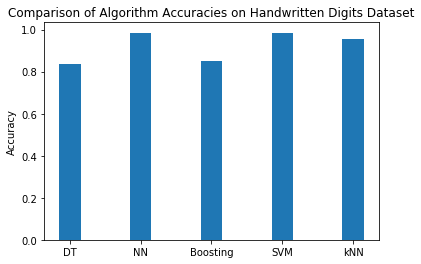

In [22]:
# Best hyperparametrised estimators
estimators = [
    DecisionTreeClassifier(max_depth=20, max_leaf_nodes=70),
    MLPClassifier(hidden_layer_sizes=np.full((5, ), 100), batch_size=112),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=20), learning_rate=0.01, n_estimators=15
    ),
    SVC(kernel='poly', C=10, degree=4),
    KNeighborsClassifier(weights='uniform', n_neighbors=22)
]

accuracies = test_accuracies(estimators=estimators, dataset_idx=1)
print(f"Best algorithm is {categories[np.argmax(accuracies)]}\nwith accuracy {accuracies[np.argmax(accuracies)]}")
plot_accuracies(accuracies=accuracies, dataset_name='Handwritten Digits Dataset')
plt.show()

As opposed to the plot for problem 1, this time Neural Networks and SVM take the lead to hit around 98% accuracy on classifying handwritten digits. kNN is again slightly behind but performing well too. The tree models achieves over 80% accuracy, which is good but less so. The best result is delivered by Neural Networks at 98.5% accuracy.

Comparing the two problems, the spotify sentiment problem is more difficult because every model in the handwritten digits classification problem has an accuracy higher than its top performer Boosting. It is also fascinating to see how the models switch rankings when we change the problem to another, showing that each model indeed has its own strengths and weaknesses, and application is always context/domain-dependent.

In [ ]:
# Clean up Warning